In [4]:
%matplotlib inline

import numpy
import pandas
import matplotlib.pyplot as pl

In [5]:
from prediction_model.applib import to_vector, reverse_norma, max_or_null

In [6]:
# Read the test data

data = pandas.read_csv('prediction_model/static_tmp/test_weather_data.csv', sep=';')
service_names = data.columns.values[1:-1]
data

,Datetime(No),accuweather,weather_com,real
0,1,19.0,19.5,19.0
1,2,20.0,21.0,20.0
2,3,23.0,25.0,26.0
3,4,27.0,27.0,28.0
4,5,26.0,24.0,27.0
5,6,26.0,21.0,25.0
6,7,24.0,23.0,23.0
7,8,22.0,20.0,23.0
8,9,20.0,21.0,21.0
9,10,20.0,19.0,20.0


In [7]:
def l2_error(X, real):
    row, col = real.shape
    errors = numpy.zeros((X.shape[1], 1))

    for i, v in enumerate(X.T):
        v = v.reshape((len(v), 1))
        errors[i] = numpy.sum((v - real) ** 2) / row
    return reverse_norma(errors)


def l1_error(X, real):
    row, col = real.shape
    errors = numpy.zeros((X.shape[1], 1))

    for i, v in enumerate(X.T):
        v = v.reshape((len(v), 1))
        errors[i] = numpy.sum(numpy.abs(v - real)) / row
    return reverse_norma(errors)

In [8]:
# Convert data into convenient format

X = to_vector(data.iloc[:, 1].apply(float))
X = numpy.hstack((X, to_vector(data.iloc[:, 2].apply(float))))
real = to_vector(data.iloc[:, 3].apply(float))

row, col = real.shape

In [9]:
w_l2 = l2_error(X, real)
w_l1 = l1_error(X, real)

res_l2 = numpy.array([w_l2.T.dot(v) for v in X]).reshape(row, col)
res_l1 = numpy.array([w_l1.T.dot(v) for v in X]).reshape(row, col)

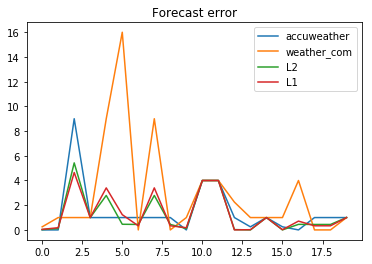

In [10]:
for v, sn in zip(X.T, service_names):
    v = v.reshape((len(v), 1))
    pl.plot((v - real) ** 2, label=sn)

pl.title('Forecast error')
pl.plot((res_l2 - real) ** 2, label='L2')
pl.plot((res_l1 - real) ** 2, label='L1')
pl.legend()

In [11]:
# Calculate errors

print("Total errors")

for v, sn in zip(X.T, service_names):
    v = v.reshape((len(v), 1))
    print(f"{sn}: {numpy.sum((v - real) ** 2) / row}")

print(f"L2: {numpy.sum((res_l2 - real) ** 2) / row}")
print(f"L1: {numpy.sum((res_l1 - real) ** 2) / row}")

Total errors
accuweather: 1.425
weather_com: 2.825
L2: 1.2480830449827
L1: 1.308654320987658
